In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd

from scipy import ndimage

import contextily as cx

import matplotlib.pylab as pylab
import matplotlib

from shapely.geometry import Point
from shapely.geometry import LineString

from utils.gpdutils import generate_gpd, generate_lines,\
                        generate_routine, generate_adjusted_geometry,\
                        generate_belonging_relations, generate_buffers,\
                        print_belonging_relations, generate_base_length,\
                        generate_cum_length
        
from utils.timeutils import time_transfer

In [4]:
gps = pd.read_csv('./data/gps/gps_0906.csv')
gps = time_transfer(gps)
gps = generate_gpd(gps, True)

In [5]:
mapdf = pd.read_excel('./data/map/map_up.xlsx')
mapdf = generate_gpd(mapdf, True)

In [6]:
routine = generate_routine(gps, 0, 0)
mapline = generate_lines(mapdf)
mapline = generate_buffers(mapline)

In [7]:
routine = generate_belonging_relations(routine, mapline)


In [8]:
print_belonging_relations(routine)

length of routine is: 444
well matched: 339
multiple matched: 28
none matched: 77


In [9]:
routine = generate_adjusted_geometry(routine)

d:\programs\envs\ox\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [10]:

mapline = generate_base_length(mapline)


In [11]:
routine = generate_cum_length(routine, mapline)
routine

,vid,time,lon,lat,direction,nidx,deadheading,month,day,geometry,belong_rect_buffer,belong_circ_buffer,belong_line,belong_line_idx,selected_line,selected_line_idx,adjusted_geometry,base_length,cum_length
0,4,2021-09-06 05:53:34,121.250374,31.407167,0,0,0,9,6,POINT (13497529.892 3685741.193),[POLYGON ((13497563.402962964 3685413.00299382...,[POLYGON ((13497563.402962964 3685413.00299382...,[],[],LINESTRING (13497554.827739913 3685790.1042448...,0.0,POINT (13497549.179066416 3685739.058892134),0.000000,51.356943
1,4,2021-09-06 05:53:38,121.250400,31.407225,0,0,0,9,6,POINT (13497532.786 3685748.758),[POLYGON ((13497563.402962964 3685413.00299382...,[POLYGON ((13497563.402962964 3685413.00299382...,[],[],LINESTRING (13497554.827739913 3685790.1042448...,0.0,POINT (13497550.041083984 3685746.848683999),0.000000,43.519600
2,4,2021-09-06 05:53:44,121.250380,31.407220,0,0,0,9,6,POINT (13497530.560 3685748.106),[POLYGON ((13497563.402962964 3685413.00299382...,[POLYGON ((13497563.402962964 3685413.00299382...,[],[],LINESTRING (13497554.827739913 3685790.1042448...,0.0,POINT (13497549.942856846 3685745.96103509),0.000000,44.412668
3,4,2021-09-06 05:54:24,121.250656,31.407364,0,0,0,9,6,POINT (13497561.284 3685766.888),[POLYGON ((13497563.402962964 3685413.00299382...,[POLYGON ((13497563.402962964 3685413.00299382...,[],[],LINESTRING (13497554.827739913 3685790.1042448...,0.0,POINT (13497552.367794594 3685767.8744635736),0.000000,22.365476
4,4,2021-09-06 05:54:35,121.250630,31.407364,0,0,0,9,6,POINT (13497558.390 3685766.888),[POLYGON ((13497563.402962964 3685413.00299382...,[POLYGON ((13497563.402962964 3685413.00299382...,[],[],LINESTRING (13497554.827739913 3685790.1042448...,0.0,POINT (13497552.332780799 3685767.5580545077),0.000000,22.683816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,4,2021-09-06 07:07:08,121.250580,31.331314,0,0,0,9,6,POINT (13497552.824 3675851.737),[POLYGON ((13497388.122115772 3676050.36378577...,[POLYGON ((13497388.122115772 3676050.36378577...,[],[],LINESTRING (13497605.16641365 3675728.91993203...,83.0,POINT (13497545.458236985 3675848.044786874),17108.102438,17241.353319
440,4,2021-09-06 07:07:18,121.250336,31.331903,0,0,0,9,6,POINT (13497525.662 3675928.498),[POLYGON ((13497388.122115772 3676050.36378577...,[POLYGON ((13497388.122115772 3676050.36378577...,[],[],LINESTRING (13497605.16641365 3675728.91993203...,83.0,POINT (13497509.255136875 3675920.2742416384),17108.102438,17322.147865
441,4,2021-09-06 07:07:28,121.250050,31.332483,0,0,0,9,6,POINT (13497493.825 3676004.086),[POLYGON ((13497388.122115772 3676050.36378577...,[POLYGON ((13497388.122115772 3676050.36378577...,[],[],LINESTRING (13497605.16641365 3675728.91993203...,83.0,POINT (13497472.582958605 3675993.439562654),17108.102438,17403.989253
442,4,2021-09-06 07:07:38,121.250015,31.332767,0,0,0,9,6,POINT (13497489.928 3676041.099),[POLYGON ((13497388.122115772 3676050.36378577...,[POLYGON ((13497388.122115772 3676050.36378577...,[],[],LINESTRING (13497605.16641365 3675728.91993203...,83.0,POINT (13497456.97395778 3676024.581360334),17108.102438,17438.823898


(3685000.0, 3686000.0)

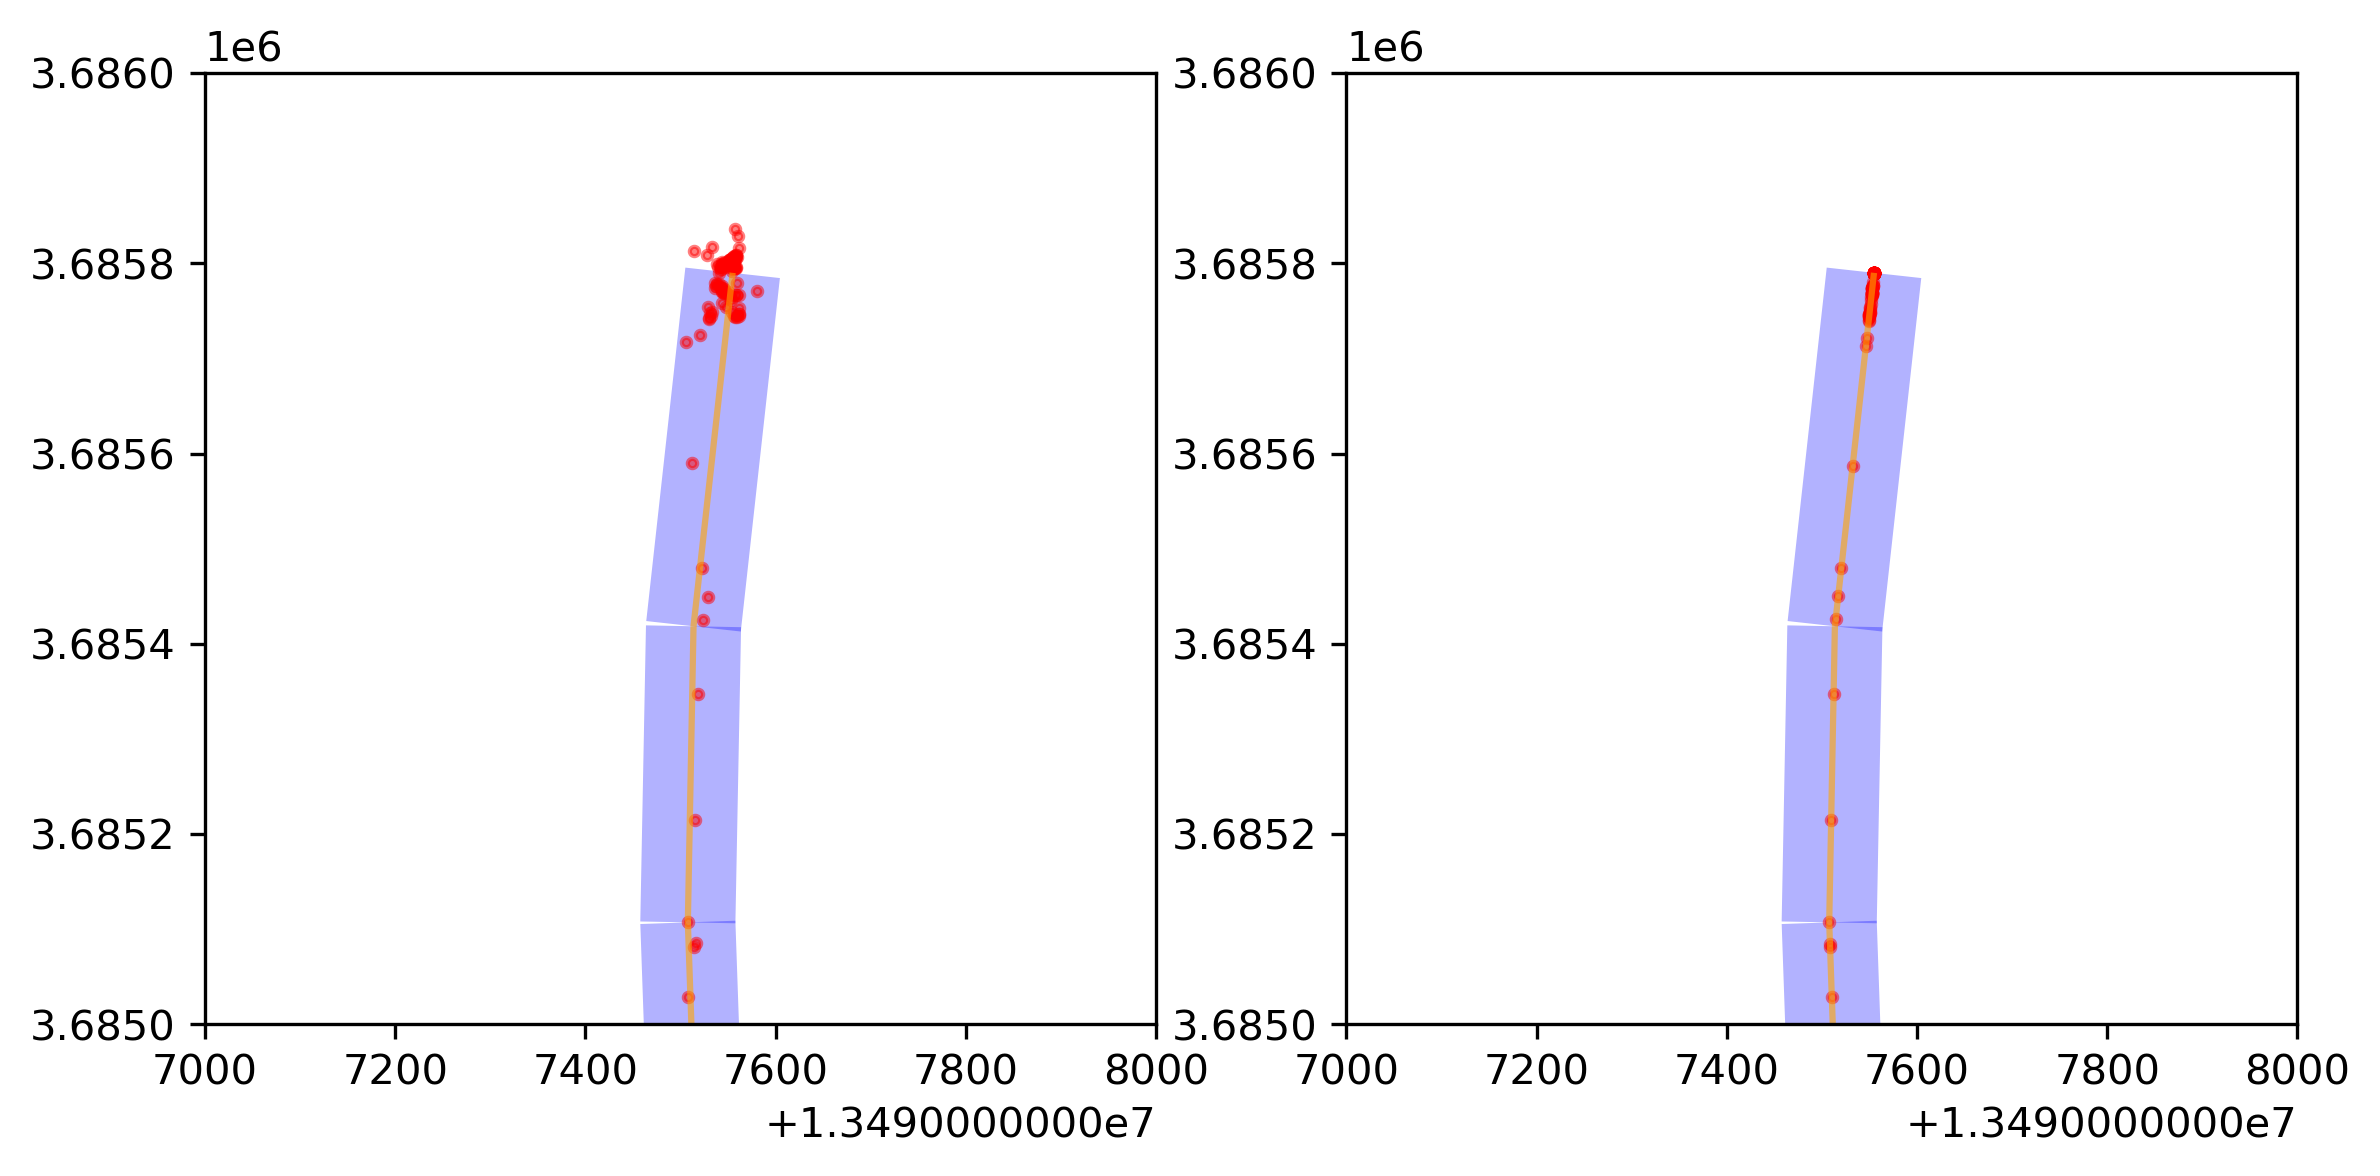

In [19]:
fig, ax = plt.subplots(1,2,figsize=(9,6),dpi=300)
mapline['rect_buffer'].plot(ax = ax[0], color = 'blue', alpha=0.3)
mapline.plot(ax = ax[0], color = 'orange',alpha=0.6)
routine.plot(ax = ax[0], color = 'red', alpha = 0.5, markersize = 5)

# ax[0].set_xlim((5400+1.349e7, 6500+1.349e7))
# ax[0].set_ylim((3.6822e6, 3.684e6))
ax[0].set_xlim((7000+1.349e7, 8000+1.349e7))
ax[0].set_ylim((3.685e6, 3.686e6))

mapline['rect_buffer'].plot(ax = ax[1], color = 'blue', alpha=0.3)
mapline.plot(ax = ax[1], color = 'orange',alpha=0.6)
adjusted_routine = gpd.GeoDataFrame({'geometry':routine['adjusted_geometry']})
adjusted_routine.plot(ax = ax[1], color = 'red', alpha = 0.5, markersize = 5)
# routine['adjusted_geometry'].plot(ax = ax[1], color = 'red', alpha = 0.5, markersize = 5)

# ax[1].set_xlim((5400+1.349e7, 6500+1.349e7))
# ax[1].set_ylim((3.6822e6, 3.684e6))
ax[1].set_xlim((7000+1.349e7, 8000+1.349e7))
ax[1].set_ylim((3.685e6, 3.686e6))


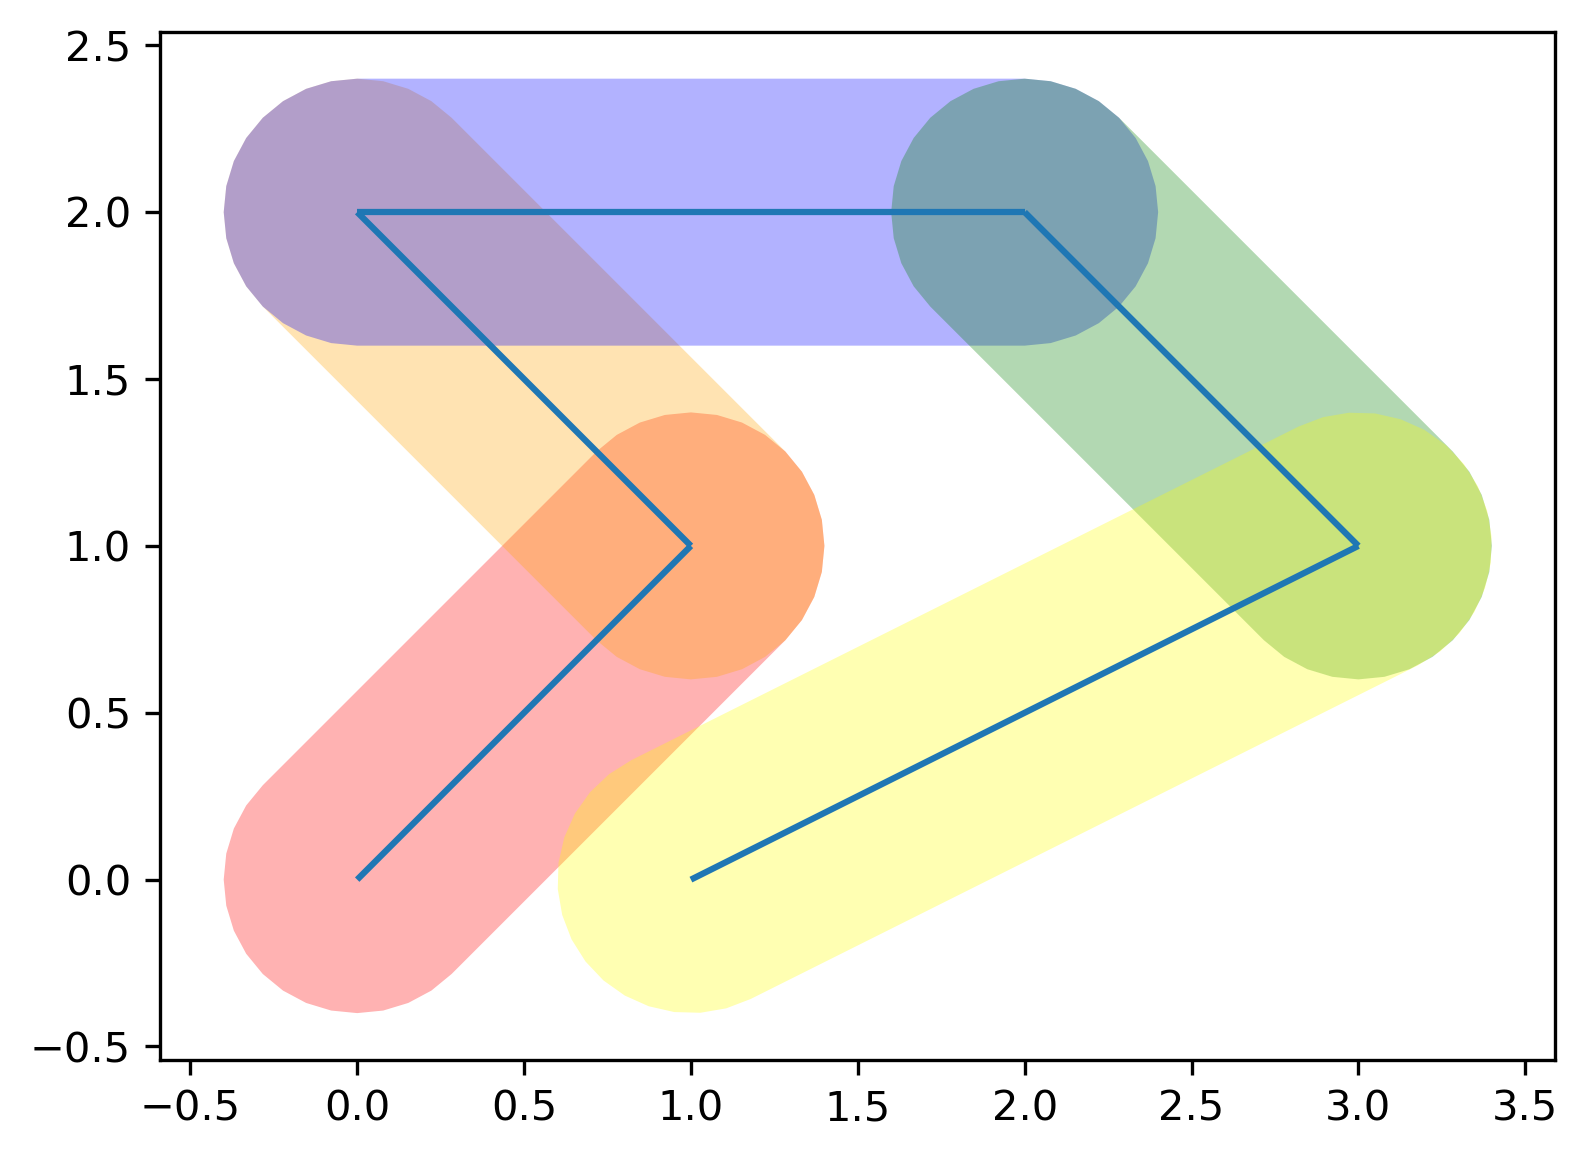

In [13]:
# testline = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
testlines = gpd.GeoSeries([LineString([(0, 0), (1, 1)]),
                            LineString([(1, 1), (0, 2)]),
                            LineString([(0, 2), (2, 2)]),
                            LineString([(2, 2), (3, 1)]),
                            LineString([(3, 1), (1, 0)])])
testbuffer = testlines.buffer(0.4, cap_style=1, join_style=2)
fig, ax = plt.subplots(figsize=(6,6),dpi=300)
gpd.GeoSeries(testlines).plot(ax = ax)
color = ['red','orange','blue','green','yellow']
for i in range(len(testbuffer)):
    gpd.GeoSeries(testbuffer[i]).plot(ax = ax, color = color[i], alpha=0.3)

In [14]:
routine

,vid,time,lon,lat,direction,nidx,deadheading,month,day,geometry,belong_rect_buffer,belong_circ_buffer,belong_line,belong_line_idx,selected_line,selected_line_idx,adjusted_geometry,base_length,cum_length
0,4,2021-09-06 05:53:34,121.250374,31.407167,0,0,0,9,6,POINT (13497529.892 3685741.193),[POLYGON ((13497563.402962964 3685413.00299382...,[POLYGON ((13497563.402962964 3685413.00299382...,[],[],LINESTRING (13497554.827739913 3685790.1042448...,0.0,POINT (13497549.179066416 3685739.058892134),0.000000,51.356943
1,4,2021-09-06 05:53:38,121.250400,31.407225,0,0,0,9,6,POINT (13497532.786 3685748.758),[POLYGON ((13497563.402962964 3685413.00299382...,[POLYGON ((13497563.402962964 3685413.00299382...,[],[],LINESTRING (13497554.827739913 3685790.1042448...,0.0,POINT (13497550.041083984 3685746.848683999),0.000000,43.519600
2,4,2021-09-06 05:53:44,121.250380,31.407220,0,0,0,9,6,POINT (13497530.560 3685748.106),[POLYGON ((13497563.402962964 3685413.00299382...,[POLYGON ((13497563.402962964 3685413.00299382...,[],[],LINESTRING (13497554.827739913 3685790.1042448...,0.0,POINT (13497549.942856846 3685745.96103509),0.000000,44.412668
3,4,2021-09-06 05:54:24,121.250656,31.407364,0,0,0,9,6,POINT (13497561.284 3685766.888),[POLYGON ((13497563.402962964 3685413.00299382...,[POLYGON ((13497563.402962964 3685413.00299382...,[],[],LINESTRING (13497554.827739913 3685790.1042448...,0.0,POINT (13497552.367794594 3685767.8744635736),0.000000,22.365476
4,4,2021-09-06 05:54:35,121.250630,31.407364,0,0,0,9,6,POINT (13497558.390 3685766.888),[POLYGON ((13497563.402962964 3685413.00299382...,[POLYGON ((13497563.402962964 3685413.00299382...,[],[],LINESTRING (13497554.827739913 3685790.1042448...,0.0,POINT (13497552.332780799 3685767.5580545077),0.000000,22.683816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,4,2021-09-06 07:07:08,121.250580,31.331314,0,0,0,9,6,POINT (13497552.824 3675851.737),[POLYGON ((13497388.122115772 3676050.36378577...,[POLYGON ((13497388.122115772 3676050.36378577...,[],[],LINESTRING (13497605.16641365 3675728.91993203...,83.0,POINT (13497545.458236985 3675848.044786874),17108.102438,17241.353319
440,4,2021-09-06 07:07:18,121.250336,31.331903,0,0,0,9,6,POINT (13497525.662 3675928.498),[POLYGON ((13497388.122115772 3676050.36378577...,[POLYGON ((13497388.122115772 3676050.36378577...,[],[],LINESTRING (13497605.16641365 3675728.91993203...,83.0,POINT (13497509.255136875 3675920.2742416384),17108.102438,17322.147865
441,4,2021-09-06 07:07:28,121.250050,31.332483,0,0,0,9,6,POINT (13497493.825 3676004.086),[POLYGON ((13497388.122115772 3676050.36378577...,[POLYGON ((13497388.122115772 3676050.36378577...,[],[],LINESTRING (13497605.16641365 3675728.91993203...,83.0,POINT (13497472.582958605 3675993.439562654),17108.102438,17403.989253
442,4,2021-09-06 07:07:38,121.250015,31.332767,0,0,0,9,6,POINT (13497489.928 3676041.099),[POLYGON ((13497388.122115772 3676050.36378577...,[POLYGON ((13497388.122115772 3676050.36378577...,[],[],LINESTRING (13497605.16641365 3675728.91993203...,83.0,POINT (13497456.97395778 3676024.581360334),17108.102438,17438.823898


In [15]:
a = LineString([[1,2],[3,4]])
a.coords[0]

(1.0, 2.0)